## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  10.395332  1238.049997  0.136723   5.084331  1.742211
1  56.657168   591.607648  0.549441  10.431077  1.385868
2  63.937386  1333.286450  0.512929   4.387207  1.407990
3  60.927672   899.847501  0.977950   3.866656  1.428471
4  42.078521   891.913150  0.220408   7.041755  1.344135


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0030272	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9919999	total: 57.8ms	remaining: 28.8s
2:	learn: 0.9819148	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9719797	total: 58.6ms	remaining: 14.6s
4:	learn: 0.9600208	total: 59ms	remaining: 11.7s
5:	learn: 0.9493624	total: 62.9ms	remaining: 10.4s
6:	learn: 0.9406322	total: 63.3ms	remaining: 8.98s
7:	learn: 0.9304310	total: 63.7ms	remaining: 7.9s
8:	learn: 0.9209054	total: 65.4ms	remaining: 7.2s
9:	learn: 0.9128098	total: 65.8ms	remaining: 6.51s
10:	learn: 0.9037603	total: 66.5ms	remaining: 5.97s
11:	learn: 0.8949241	total: 66.8ms	remaining: 5.5s
12:	learn: 0.8856005	total: 70.5ms	remaining: 5.36s
13:	learn: 0.8769285	total: 71.2ms	remaining: 5.01s
14:	learn: 0.8681239	total: 71.8ms	remaining: 4.72s
15:	learn: 0.8591488	total: 72.6ms	remaining: 4.46s
16:	learn: 0.8510341	total: 74.4ms	remaining: 4.3s
17:	learn: 0.8442771	total: 75.3ms	remaining: 4.11s
18:	learn: 0.8349866	total: 76ms	remaining: 3.93s


78:	learn: 0.4999007	total: 104ms	remaining: 1.21s
79:	learn: 0.4958043	total: 104ms	remaining: 1.2s
80:	learn: 0.4914547	total: 105ms	remaining: 1.19s
81:	learn: 0.4884543	total: 105ms	remaining: 1.18s
82:	learn: 0.4853945	total: 106ms	remaining: 1.17s
83:	learn: 0.4825722	total: 106ms	remaining: 1.15s
84:	learn: 0.4788130	total: 106ms	remaining: 1.14s
85:	learn: 0.4755453	total: 107ms	remaining: 1.13s
86:	learn: 0.4725622	total: 107ms	remaining: 1.12s
87:	learn: 0.4695591	total: 107ms	remaining: 1.11s
88:	learn: 0.4667227	total: 108ms	remaining: 1.1s
89:	learn: 0.4637595	total: 108ms	remaining: 1.09s
90:	learn: 0.4597507	total: 109ms	remaining: 1.08s
91:	learn: 0.4561377	total: 109ms	remaining: 1.07s
92:	learn: 0.4534158	total: 109ms	remaining: 1.07s
93:	learn: 0.4505011	total: 110ms	remaining: 1.06s
94:	learn: 0.4468041	total: 110ms	remaining: 1.05s
95:	learn: 0.4443402	total: 111ms	remaining: 1.04s
96:	learn: 0.4411711	total: 111ms	remaining: 1.03s
97:	learn: 0.4386545	total: 111ms

259:	learn: 0.2038228	total: 184ms	remaining: 523ms
260:	learn: 0.2031211	total: 184ms	remaining: 522ms
261:	learn: 0.2027282	total: 185ms	remaining: 521ms
262:	learn: 0.2021917	total: 185ms	remaining: 519ms
263:	learn: 0.2011984	total: 186ms	remaining: 518ms
264:	learn: 0.2005364	total: 186ms	remaining: 516ms
265:	learn: 0.2001560	total: 187ms	remaining: 515ms
266:	learn: 0.1992263	total: 187ms	remaining: 513ms
267:	learn: 0.1988558	total: 187ms	remaining: 511ms
268:	learn: 0.1980634	total: 188ms	remaining: 510ms
269:	learn: 0.1976256	total: 188ms	remaining: 509ms
270:	learn: 0.1971734	total: 189ms	remaining: 507ms
271:	learn: 0.1961372	total: 189ms	remaining: 506ms
272:	learn: 0.1951283	total: 189ms	remaining: 505ms
273:	learn: 0.1943503	total: 190ms	remaining: 504ms
274:	learn: 0.1935771	total: 191ms	remaining: 502ms
275:	learn: 0.1928369	total: 191ms	remaining: 501ms
276:	learn: 0.1922639	total: 191ms	remaining: 499ms
277:	learn: 0.1918130	total: 192ms	remaining: 498ms
278:	learn: 

483:	learn: 0.1088421	total: 286ms	remaining: 305ms
484:	learn: 0.1083487	total: 286ms	remaining: 304ms
485:	learn: 0.1081236	total: 287ms	remaining: 303ms
486:	learn: 0.1076943	total: 287ms	remaining: 302ms
487:	learn: 0.1072150	total: 288ms	remaining: 302ms
488:	learn: 0.1067469	total: 288ms	remaining: 301ms
489:	learn: 0.1063160	total: 289ms	remaining: 300ms
490:	learn: 0.1060820	total: 289ms	remaining: 300ms
491:	learn: 0.1056252	total: 289ms	remaining: 299ms
492:	learn: 0.1051937	total: 290ms	remaining: 298ms
493:	learn: 0.1047493	total: 290ms	remaining: 297ms
494:	learn: 0.1044528	total: 291ms	remaining: 296ms
495:	learn: 0.1041706	total: 291ms	remaining: 296ms
496:	learn: 0.1038925	total: 291ms	remaining: 295ms
497:	learn: 0.1037077	total: 292ms	remaining: 294ms
498:	learn: 0.1032963	total: 293ms	remaining: 294ms
499:	learn: 0.1031144	total: 293ms	remaining: 293ms
500:	learn: 0.1027660	total: 293ms	remaining: 292ms
501:	learn: 0.1023611	total: 294ms	remaining: 291ms
502:	learn: 

658:	learn: 0.0645469	total: 366ms	remaining: 189ms
659:	learn: 0.0643599	total: 366ms	remaining: 189ms
660:	learn: 0.0641249	total: 366ms	remaining: 188ms
661:	learn: 0.0639303	total: 367ms	remaining: 187ms
662:	learn: 0.0636717	total: 367ms	remaining: 187ms
663:	learn: 0.0634879	total: 368ms	remaining: 186ms
664:	learn: 0.0632359	total: 368ms	remaining: 185ms
665:	learn: 0.0630767	total: 369ms	remaining: 185ms
666:	learn: 0.0628293	total: 369ms	remaining: 184ms
667:	learn: 0.0626730	total: 369ms	remaining: 184ms
668:	learn: 0.0624302	total: 370ms	remaining: 183ms
669:	learn: 0.0622438	total: 370ms	remaining: 182ms
670:	learn: 0.0620903	total: 371ms	remaining: 182ms
671:	learn: 0.0619084	total: 371ms	remaining: 181ms
672:	learn: 0.0617516	total: 372ms	remaining: 181ms
673:	learn: 0.0615148	total: 372ms	remaining: 180ms
674:	learn: 0.0613561	total: 372ms	remaining: 179ms
675:	learn: 0.0611906	total: 373ms	remaining: 179ms
676:	learn: 0.0609387	total: 373ms	remaining: 178ms
677:	learn: 

881:	learn: 0.0367181	total: 467ms	remaining: 62.5ms
882:	learn: 0.0366413	total: 468ms	remaining: 61.9ms
883:	learn: 0.0365721	total: 468ms	remaining: 61.4ms
884:	learn: 0.0364432	total: 468ms	remaining: 60.8ms
885:	learn: 0.0363691	total: 469ms	remaining: 60.3ms
886:	learn: 0.0362972	total: 469ms	remaining: 59.7ms
887:	learn: 0.0362180	total: 469ms	remaining: 59.2ms
888:	learn: 0.0361502	total: 470ms	remaining: 58.7ms
889:	learn: 0.0360720	total: 470ms	remaining: 58.1ms
890:	learn: 0.0359973	total: 471ms	remaining: 57.6ms
891:	learn: 0.0358614	total: 471ms	remaining: 57.1ms
892:	learn: 0.0357854	total: 472ms	remaining: 56.5ms
893:	learn: 0.0357186	total: 472ms	remaining: 56ms
894:	learn: 0.0356459	total: 473ms	remaining: 55.5ms
895:	learn: 0.0355744	total: 473ms	remaining: 54.9ms
896:	learn: 0.0354423	total: 474ms	remaining: 54.4ms
897:	learn: 0.0353723	total: 474ms	remaining: 53.9ms
898:	learn: 0.0352799	total: 475ms	remaining: 53.4ms
899:	learn: 0.0352109	total: 475ms	remaining: 52

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

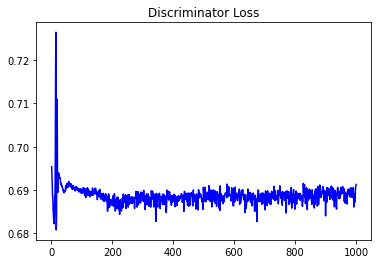

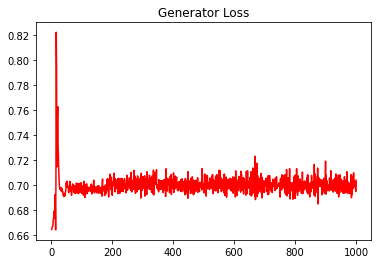

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.4620293543754653


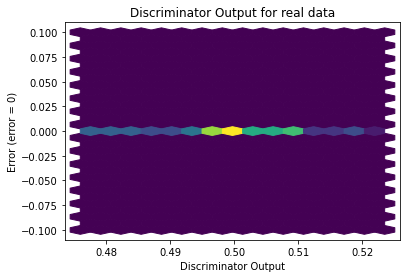

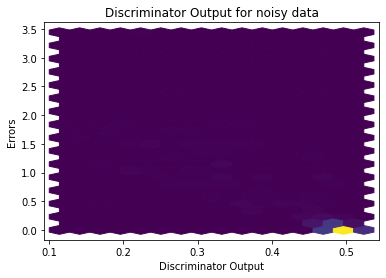

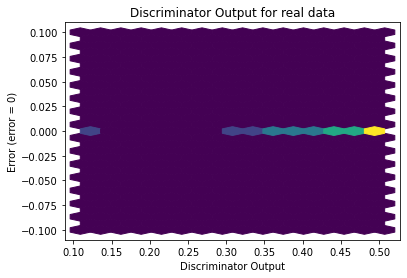

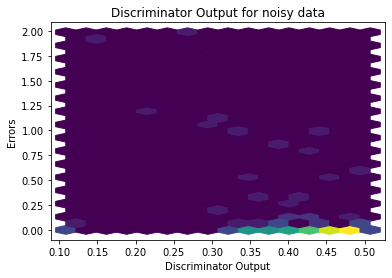

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


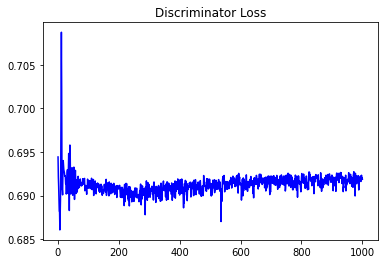

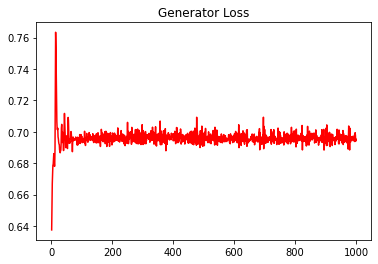

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3455836530214806


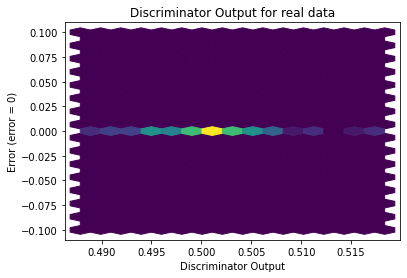

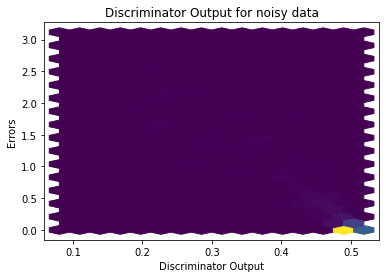

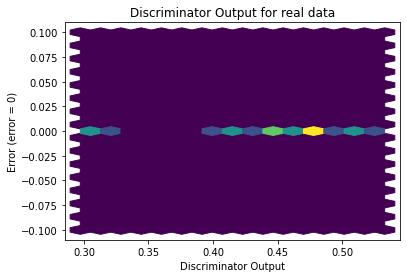

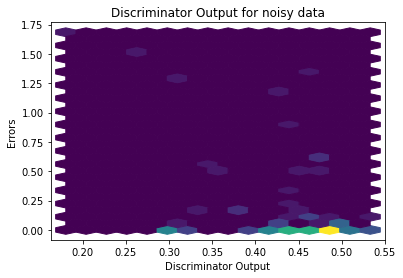

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9839]], requires_grad=True)
